In [1]:
import getpass
import os
from dotenv import load_dotenv

dotenv_path = os.path.join(os.getcwd(), '.env')
load_dotenv(dotenv_path)

if not os.environ.get("OPENAI_API_KEY"):
  os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter API key for OpenAI: ")

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain.chat_models import init_chat_model
from langgraph.checkpoint.memory import MemorySaver

llm = init_chat_model("gpt-4o-mini", model_provider="openai")

class State(TypedDict):
    messages: Annotated[list, add_messages]

def chatbot(state: State):
    print("---------Chatbot---------")
    print("State:",state)
    return {"messages": [llm.invoke(state["messages"])]}

def human_clarification(state: State):
    print("---------Human Clarification---------")
    return 
    
def premarket(state: State):
    print("---------Premarket---------")
    return {"messages": [llm.invoke(state["messages"])]}

def intraday(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

def postmarket(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

def strategy(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

def summary(state: State):
    print("---------Summary---------")
    print("State:",state)
    return

def gating_mechanism(state: State):
    return "human_clarification"

graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("human_clarification", human_clarification)
graph_builder.add_node("premarket", premarket)
graph_builder.add_node("intraday", intraday)
graph_builder.add_node("postmarket", postmarket)
graph_builder.add_node("strategy", strategy)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("human_clarification", "chatbot")
graph_builder.add_conditional_edges("chatbot", gating_mechanism, ["human_clarification", "premarket", "intraday", "postmarket", "strategy"])
graph_builder.add_node("summary", summary)
graph_builder.add_edge("premarket", "summary")
graph_builder.add_edge("intraday", "summary")
graph_builder.add_edge("postmarket", "summary")
graph_builder.add_edge("strategy", "summary")
graph_builder.add_edge("summary", END)

checkpointer = MemorySaver()
graph = graph_builder.compile(checkpointer=checkpointer, interrupt_before=["human_clarification"])

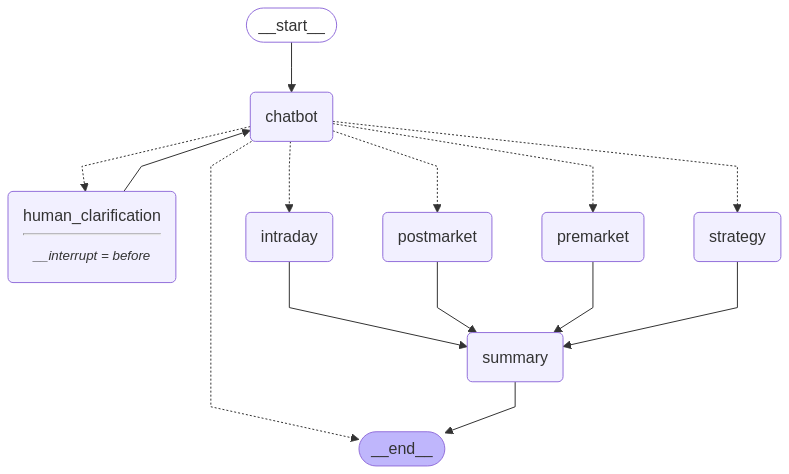

In [3]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [4]:
from langchain_core.messages import HumanMessage, SystemMessage
thread_config = {"configurable": {"thread_id": "paldemo"}}
for event in graph.stream({"messages": [HumanMessage("How are you today?")]}, config=thread_config, stream_mode="values"):
    print(event)

# history = list(graph.get_state_history(thread_config))
# print("---------History---------")
# print(history)
# graph.invoke({"messages": [HumanMessage("How are you today?")]})

{'messages': [HumanMessage(content='How are you today?', additional_kwargs={}, response_metadata={}, id='01d8a847-9320-47cf-a41a-d1868501d377')]}
---------Chatbot---------
State: {'messages': [HumanMessage(content='How are you today?', additional_kwargs={}, response_metadata={}, id='01d8a847-9320-47cf-a41a-d1868501d377')]}
{'messages': [HumanMessage(content='How are you today?', additional_kwargs={}, response_metadata={}, id='01d8a847-9320-47cf-a41a-d1868501d377'), AIMessage(content="I'm just a computer program, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 12, 'total_tokens': 41, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'syste